# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis
---

## Computer Assignment 2 - SimCLR
---

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* Dry question: SimCLR vs approximate Spectral Clustering
* Implementation
    * SimCLR for downstream classification

#### Use as many cells as you need
#### אפשר גם לכתוב בעברית, אבל עדיף באנגלית

* Code Tasks are denoted with: <img src="https://img.icons8.com/color/48/null/code.png">
* Questions (which you need to answer in a Markdown cell) are denoted with: <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png">

### <img src="https://img.icons8.com/bubbles/50/null/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Nadav Zohar| nadav.zohar@campus.technion.ac.il| 206457343|
|Dor Yefet| dor.yefet@campus.technion.ac.il| 208017657 |
|Amit Amram| amit.amram@campus.technion.ac.il| 209064849|


### <img src="https://img.icons8.com/bubbles/50/null/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: **100** (even with a bonus, the grade will not be above 100).
    * Example: if you got 5 points bonus, but you were correct in all sections, your grade will still be 100 (and not 105).
    * Example: if you got 5 points bonus, and 6 points were deducted for wrong answers, your grade will be 99.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * Submit a `.zip` file with the name `ee046202_wet2_id1_id2.zip` with content:
        * `ee046202_wet2_id1_id2.ipynb` - the code tasks
        * `ee046202_wet2_id1_id2.pdf` - answers to questions. If you solved everything in the notebook, print the notebook as pdf. **Make sure all plots are displayed**
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/clouds/96/null/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/cute-clipart/64/null/info.png" style="height:50px;display:inline"> Tip
---
If you find it more convenient, you can copy the section to a new cell, and answer the question or rite the code just right below it. For example:

#### Question 0
1. What is the best course in the Technion?
2. Why does no one pick Bulbasaur as first pokemon?
3. Why is there no superhero named Catman?

#### Answers - Q0

#### Q0 - Section 1
* Q: What is the best course in the Technion?

In [ ]:
print("ANAM!")

ANAM!


#### Q0 - Section 2
* Q: Why does no one pick Bulbasaur as first pokemon?

It is really a riddle....

#### Q0 - Section 3
* Q: Why is there no superhero named Catman?

I got nothing.

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Dry Question - SimCLR vs approximate spectral clustering
---
In this question, we will mark $(x,x^+)$ as a postive pair, and $x'_i$ as the other images in the same batch (without distrinction on augmentation).
We will also mark the representation function as $f(x)$ (as in the original paper).
1. Show that the N-pair contrastive loss used in SimCLR (NT-Xent) can be written as $$\ell_{x,x^+}=-f(x)^Tf(x^+)+\log\left (e^{f(x)^Tf(x^+)}+\sum_{i=1}^{2N}I_{[x_i\neq x,x^+]}e^{f(x)^Tf(x_i)}\right )$$
    * Use $\tau=1$, $sim(f(x_1),f(x_2))=f(x_1)^Tf(x_2)$.
    
Suppose we define a graph of augmentations, such that the weight of each augmented pair is its marginal probability $w_{x,x'}=\mathbb{E}_{\bar{x}\sim P_X}[\mathrm{Pr}(x|\bar{x})\mathrm{Pr}(x'|\bar{x})]$.
<a href="https://proceedings.neurips.cc/paper/2021/hash/27debb435021eb68b3965290b5e24c49-Abstract.html">HaoChen, J. Z., et al.</a> show that Spectral Clustering on the data augmentation graph plus a linear classification head can generalize well under some (complicated) conditions.

Spectral clustering would attempt to find the optimal embedding matrix $F^*$ that minimizes $$F^*=\arg\min_F ||\bar{L}-FF^T||^2_F$$ where $\bar{L}$ is the normalized Laplacian of the augmentations graph.
This is not actually feasible unless the embedding is very small, so we parametrize the rows of $F^*$ using a neural network $f$ and minimize the **spectral contrastive loss** $$L(f)=-2\mathbb{E}_{x,x^+}[f(x)^T f(x^+)]+\mathbb{E}_{x,x'}[(f(x)^T f(x'))^2]$$ where we assume that $x,x^+,x'$ are drawn independently from each other given a random source data point.

2. Compare the spectral contrastive loss $L(f)$ and the NT-Xent loss $\ell_{x,x^+}$. How could we translate one to the other?
3. What is the main advantage of using $L(f)$ over $\ell_{x,x^+}$? Hint: Consider the batch size $N$.

------

### <img src="https://img.icons8.com/color/48/null/code.png" style="height:50px;display:inline"> Task 1 - SimCLR
---
In this task, we will use SimCLR to learn an embedding for images from CIFAR-10, and use that embedding to classify test data.
While we do so, we will also look at the effect of batch size on the model's performance.
   
The tasks:
1. Create a SimCLR model. You can do this like the tutorial or use the built-in ```pytorch-lightning``` integration in lightly. We recommend you use lightly for this, but you can implement everything yourselves in pytorch if you want to.
2. Load the CIFAR-10 training dataset, as in the tutorial, and create a train loader.
3. For batch size$\in\{8, 32, 256\}$, train the SimCLR for 20 epochs and keep track of:
    * The average contrastive loss in each epoch
    * A checkpoint of the network in the format: `m_(value of batch size)_simclr_20_epochs.pth`
        * DO NOT SUBMIT THE CHECKPOINTS, THEY ARE FOR YOU TO USE.
    * This may take a while, especially for ```batch_size=8```, consider running on a small subset of the dataset at first and scaling up, and run the full experiment overnight.
4. For all batch sizes, plot the training loss vs. epochs. Show all three training loss curve on a single plot.
5. For each of the models from section 3, use ```model.backbone``` **as a fixed model** and a linear classification head (```nn.Linear(512, 10)```) to train a classifier for 5 epochs. Use a batch size of 64 for the optimization of the linear head.
    * See <a href="https://docs.lightly.ai/self-supervised-learning/tutorials/package/tutorial_moco_memory_bank.html">the lightly tutorial for MoCo classifier on CIFAR-10</a> if you are having issues.
    * Make sure the optimizer's parameters are *only* the linear head's parameters.
    * It may be a good idea to save a checkpoint for the linear heads.
6. Load the CIFAR-10 test dataset, evaluate the test accuracy for each classifier model and print the results.
7. Create a custom augmentation containing only ```ColorJitter``` and ```torchvision.transforms.Normalize``` with the ImageNet mean and standard deviation (```lightly.transforms.utils.IMAGENET_NORMALIZE```). Apply your augmentation to the input data and re-train the SimCLR model with batch size 256 on the new augmented dataset for 20 epochs, then use ```model.backbone``` as a fixed model like in section 5 to train a classifier for 5 epochs. Compare the test accuracy to the one achieved with normal augmentation.


* Notes:
    * Be organized - separate to different code cells if it keeps you organized.
    * Make sure to properly define the hyper-parameters (see tutorial), and define the `device` automatically. Don't forget to send all the models and tensors to the device. We will run your code on a GPU.

In [ ]:
pip install lightly

Section 1

In [ ]:
import torch
import torchvision
from lightly import loss
from lightly import transforms
from lightly.data import LightlyDataset
from lightly.models.modules import heads
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from lightly.models import SimCLR
from lightly.models.utils import deactivate_requires_grad
from lightly.transforms.utils import IMAGENET_NORMALIZE



/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # use gpu 0 i
print(device)
class SimCLR(torch.nn.Module):
    def __init__(self, backbone, device):
        super().__init__()
        self.backbone = backbone
        self.projection_head = heads.SimCLRProjectionHead(
            input_dim=512, # Resnet18 features have 512 dimensions.
            hidden_dim=512,
            output_dim=128,
        ).to(device)
        self.device=device
    def forward(self, x):
        features = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(features)
        return z
# Use a resnet backbone.
backbone = torchvision.models.resnet18().to(device)
# Ignore the classification head as we only want the features.
backbone.fc = torch.nn.Identity()
# Build the SimCLR model.
model = SimCLR(backbone, device).to(device)

cuda:0


Section 2

In [ ]:
transform = transforms.SimCLRTransform(input_size=32, cj_prob=0.5)
# Create a dataset from your image folder.
cifar_train_dataset = torchvision.datasets.CIFAR10(
    root='./datasets/',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

dataset = LightlyDataset.from_torch_dataset(cifar_train_dataset, transform=transform)

epochs = 20
batch_sizes = [8, 32, 256]
data_loaders = []
for batch_size in batch_sizes:
    # Build a PyTorch dataloader.
    dataloader = torch.utils.data.DataLoader(
        dataset, # Pass the dataset to the dataloader.
        batch_size=batch_size, # A large batch size helps with the learning.
        shuffle=True, # Shuffling is important!
    )
    data_loaders.append(dataloader)

batch_size_to_average_contrastive_loss = {}


Files already downloaded and verified


Section 3

In [ ]:
batch_size_index = 2
batch_size = 256
batch_size_to_average_contrastive_loss[batch_size] = []
dataloader = data_loaders[batch_size_index]
model_file = f"./m_{batch_size}_simclr_{epochs}_epochs.pth"
criterion = loss.NTXentLoss(temperature=0.5)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-6)
model.train()
for epoch in range(epochs):
    start_time = time.time()
    avg_loss = 0
    for (view0, view1), targets, filenames in dataloader:
        z0 = model(view0.to(device))
        z1 = model(view1.to(device))
        current_loss = criterion(z0, z1) # NT-Xent loss!
        # Same 3 steps:
        current_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        avg_loss += current_loss.item() / len(dataloader)
    batch_size_to_average_contrastive_loss[batch_size].append(avg_loss)
    print(f"epoch: {epoch}, loss: {avg_loss:.5f}, batch_size: {batch_size}, time [minutes]: {(time.time() - start_time) / 60}")
    torch.save(model, model_file)


epoch: 0, loss: 5.74607, batch_size: 256, time [minutes]: 1.731353016694387
epoch: 1, loss: 5.57625, batch_size: 256, time [minutes]: 1.7022300521532694
epoch: 2, loss: 5.50923, batch_size: 256, time [minutes]: 1.6952221194903057
epoch: 3, loss: 5.46612, batch_size: 256, time [minutes]: 1.6965744018554687
epoch: 4, loss: 5.43385, batch_size: 256, time [minutes]: 1.692798372109731
epoch: 5, loss: 5.41090, batch_size: 256, time [minutes]: 1.6978543837865194
epoch: 6, loss: 5.38931, batch_size: 256, time [minutes]: 1.7036412358283997
epoch: 7, loss: 5.37448, batch_size: 256, time [minutes]: 1.7201534628868103
epoch: 8, loss: 5.36020, batch_size: 256, time [minutes]: 1.7086260199546814
epoch: 9, loss: 5.34502, batch_size: 256, time [minutes]: 1.7040549357732138
epoch: 10, loss: 5.34236, batch_size: 256, time [minutes]: 1.704698121547699
epoch: 11, loss: 5.32469, batch_size: 256, time [minutes]: 1.6922439376513163
epoch: 12, loss: 5.31539, batch_size: 256, time [minutes]: 1.6960076252619425

In [ ]:
batch_size_index = 1
batch_size = 32
batch_size_to_average_contrastive_loss[batch_size] = []
dataloader = data_loaders[batch_size_index]
model_file = f"./m_{batch_size}_simclr_{epochs}_epochs.pth"
criterion = loss.NTXentLoss(temperature=0.5)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-6)
model.train()
for epoch in range(epochs):
    start_time = time.time()
    avg_loss = 0
    for (view0, view1), targets, filenames in dataloader:
        z0 = model(view0.to(device))
        z1 = model(view1.to(device))
        current_loss = criterion(z0, z1) # NT-Xent loss!
        # Same 3 steps:
        current_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        avg_loss += current_loss.item() / len(dataloader)
    batch_size_to_average_contrastive_loss[batch_size].append(avg_loss)
    print(f"epoch: {epoch}, loss: {avg_loss:.5f}, batch_size: {batch_size}, time [minutes]: {(time.time() - start_time) / 60}")
    torch.save(model, model_file)

epoch: 0, loss: 3.29766, batch_size: 32, time [minutes]: 2.4016867677370706
epoch: 1, loss: 3.23928, batch_size: 32, time [minutes]: 2.441925223668416
epoch: 2, loss: 3.20976, batch_size: 32, time [minutes]: 2.474523663520813
epoch: 3, loss: 3.19103, batch_size: 32, time [minutes]: 2.4954105337460835
epoch: 4, loss: 3.16716, batch_size: 32, time [minutes]: 2.507473576068878
epoch: 5, loss: 3.16399, batch_size: 32, time [minutes]: 2.4503106832504273
epoch: 6, loss: 3.14682, batch_size: 32, time [minutes]: 2.3911544760068257
epoch: 7, loss: 3.13371, batch_size: 32, time [minutes]: 2.3770554343859356
epoch: 8, loss: 3.12161, batch_size: 32, time [minutes]: 2.3415700435638427
epoch: 9, loss: 3.11800, batch_size: 32, time [minutes]: 2.3577111919720966
epoch: 10, loss: 3.11350, batch_size: 32, time [minutes]: 2.3602679133415223
epoch: 11, loss: 3.10070, batch_size: 32, time [minutes]: 2.4114983558654783
epoch: 12, loss: 3.09493, batch_size: 32, time [minutes]: 2.416004840532939
epoch: 13, lo

In [ ]:
batch_size_index = 0
batch_size = 8
batch_size_to_average_contrastive_loss[batch_size] = []
dataloader = data_loaders[batch_size_index]
model_file = f"./m_{batch_size}_simclr_{epochs}_epochs.pth"
criterion = loss.NTXentLoss(temperature=0.5)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-6)
model.train()
for epoch in range(epochs):
    start_time = time.time()
    avg_loss = 0
    for (view0, view1), targets, filenames in dataloader:
        z0 = model(view0.to(device))
        z1 = model(view1.to(device))
        current_loss = criterion(z0, z1) # NT-Xent loss!
        # Same 3 steps:
        current_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        avg_loss += current_loss.item() / len(dataloader)
    batch_size_to_average_contrastive_loss[batch_size].append(avg_loss)
    print(f"epoch: {epoch}, loss: {avg_loss:.5f}, batch_size: {batch_size}, time [minutes]: {(time.time() - start_time) / 60}")
    torch.save(model, model_file)

epoch: 0, loss: 2.14986, batch_size: 8, time [minutes]: 3.91541272799174
epoch: 1, loss: 1.98610, batch_size: 8, time [minutes]: 3.851151768366496
epoch: 2, loss: 1.90962, batch_size: 8, time [minutes]: 3.9486263553301493
epoch: 3, loss: 1.86101, batch_size: 8, time [minutes]: 3.8907981872558595
epoch: 4, loss: 1.82459, batch_size: 8, time [minutes]: 3.903598165512085
epoch: 5, loss: 1.80132, batch_size: 8, time [minutes]: 4.036270900567373
epoch: 6, loss: 1.76905, batch_size: 8, time [minutes]: 4.050644747416178
epoch: 7, loss: 1.75811, batch_size: 8, time [minutes]: 3.825530934333801
epoch: 8, loss: 1.73795, batch_size: 8, time [minutes]: 3.598910979429881
epoch: 9, loss: 1.72190, batch_size: 8, time [minutes]: 3.5715139349301657
epoch: 10, loss: 1.71073, batch_size: 8, time [minutes]: 3.623346964518229
epoch: 11, loss: 1.70615, batch_size: 8, time [minutes]: 3.629663328329722
epoch: 12, loss: 1.69504, batch_size: 8, time [minutes]: 3.6219215313593547
epoch: 13, loss: 1.68388, batch_

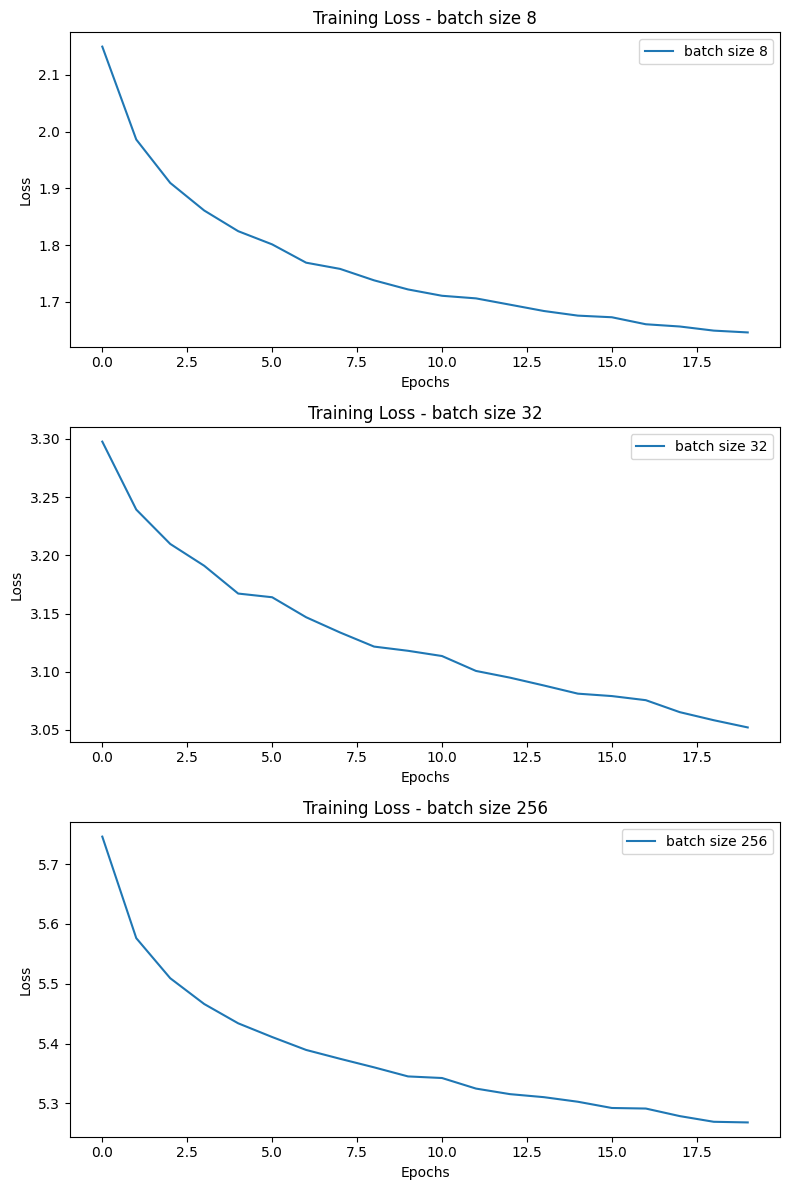

In [2]:
# Plot of the three contrastive losses - this is for our own use, each plot in its own figure to better observe the values
loss_b8 = batch_size_to_average_contrastive_loss[8]
loss_b32 = batch_size_to_average_contrastive_loss[32]
loss_b256 = batch_size_to_average_contrastive_loss[256]

fig, axs = plt.subplots(3, 1, figsize=(8, 12))
for i, batch_size in enumerate([8,32,256]):
    axs[i].plot(batch_size_to_average_contrastive_loss[batch_size], label=f'batch size {batch_size}')
    axs[i].set_title(f'Training Loss - batch size {batch_size}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')
    axs[i].legend()
plt.tight_layout()
plt.show()

Section 4

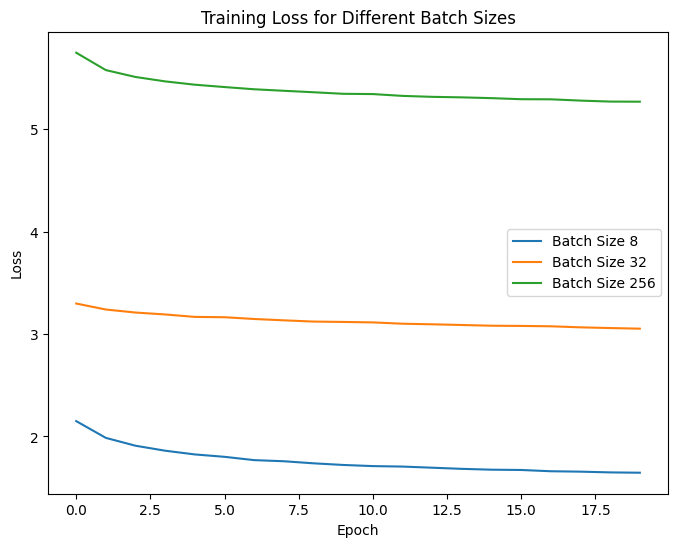

In [3]:
plt.figure(figsize=(8, 6))  # Adjust figsize as needed

# Plot data for each batch size
plt.plot(loss_b8, label='Batch Size 8')
plt.plot(loss_b32, label='Batch Size 32')
plt.plot(loss_b256, label='Batch Size 256')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Different Batch Sizes')

# Add a legend
plt.legend()

# Display the plot
plt.show()

Section 5

In [ ]:
from lightly.models.utils import deactivate_requires_grad

class FinalModel(torch.nn.Module):
    def __init__(self, device, backbone):
        super().__init__()
        self.device = device
        self.backbone = backbone
        self.fc = torch.nn.Linear(512, 10)
        deactivate_requires_grad(self.backbone)

    def forward(self, x):
        x = self.backbone(x)
        x = self.fc(x)
        return x

In [ ]:
new_batch_size = 64
new_epochs = 5

cifar_train_dataset = torchvision.datasets.CIFAR10(
    root='./datasets/',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

cifar_test_dataset = torchvision.datasets.CIFAR10(
    root='./datasets/',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

# Data loader
cifar_train_loader = torch.utils.data.DataLoader(dataset=cifar_train_dataset, batch_size=new_batch_size, shuffle=True, drop_last=True)
# Data loader
cifar_test_loader = torch.utils.data.DataLoader(dataset=cifar_test_dataset, batch_size=new_batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
for batch_size in batch_sizes:
    current_model = torch.load(f"./m_{batch_size}_simclr_20_epochs.pth")
    new_model = FinalModel(device, current_model.backbone).to(device)
    new_model.train()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(new_model.parameters(), lr=0.1)
    for epoch in range(new_epochs):
        start_time = time.time()
        avg_loss = 0
        for images, labels in cifar_train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = new_model(images)
            current_loss = criterion(outputs, labels)
            optimizer.zero_grad()
            current_loss.backward()
            optimizer.step()
            avg_loss += current_loss.item() / len(cifar_train_loader)
        print(f"epoch: {epoch}, loss: {avg_loss:.5f}, batch_size: {new_batch_size}, time [minutes]: {(time.time() - start_time) / 60}")
    torch.save(new_model, f"./trained_linear_model_{batch_size}_5_epochs.pth")

<ipython-input-20-72571a1d9f86>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  current_model = torch.load(f"/content/drive/MyDrive/m_{batch_size}_simclr_20_epochs.pth", ma

epoch: 0, loss: 12.46568, batch_size: 64, time [minutes]: 2.699828577041626
epoch: 1, loss: 11.93732, batch_size: 64, time [minutes]: 2.7027750849723815
epoch: 2, loss: 12.08458, batch_size: 64, time [minutes]: 2.77708998521169
epoch: 3, loss: 12.25069, batch_size: 64, time [minutes]: 2.6559900363286335
epoch: 4, loss: 12.14987, batch_size: 64, time [minutes]: 2.679387426376343
epoch: 0, loss: 12.37622, batch_size: 64, time [minutes]: 2.779605201880137
epoch: 1, loss: 12.10085, batch_size: 64, time [minutes]: 2.6848345081011455
epoch: 2, loss: 12.39954, batch_size: 64, time [minutes]: 2.6614017724990844
epoch: 3, loss: 12.56575, batch_size: 64, time [minutes]: 2.6873355786005657
epoch: 4, loss: 12.47354, batch_size: 64, time [minutes]: 2.7741832454999287
epoch: 0, loss: 11.25914, batch_size: 64, time [minutes]: 2.6833038290341693
epoch: 1, loss: 11.43099, batch_size: 64, time [minutes]: 2.6568195104598997
epoch: 2, loss: 11.70462, batch_size: 64, time [minutes]: 2.67601486047109
epoch:

Section 6

In [ ]:
for batch_size in batch_sizes:
    current_model = torch.load(f"./trained_linear_model_{batch_size}_5_epochs.pth")
    current_model.eval()
    with torch.no_grad():
        # "don't keep track of the gradients" -> faster, can also use .detach()
        correct = 0
        total = 0
        for images, labels in cifar_test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = current_model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f'Test Accuracy of the model of original batch size {batch_size} on the 10000 test images: {(100 * correct/total)} %')

<ipython-input-21-3d8e778648a8>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  current_model = torch.load(f"/content/drive/MyDrive/trained_linear_model_{batch_size}_5_epoc

Test Accuracy of the model of original batch size 8 on the 10000 test images: 41.14 %
Test Accuracy of the model of original batch size 32 on the 10000 test images: 39.31 %
Test Accuracy of the model of original batch size 256 on the 10000 test images: 35.36 %


Section 7

In [ ]:
# Define custom augmentation with ColorJitter and Normalize - didn't work.
# custom_transform = torchvision.transforms.Compose([
#     torchvision.transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
#     torchvision.transforms.ToTensor(),
#     torchvision.transforms.Normalize(mean=IMAGENET_NORMALIZE["mean"], std=IMAGENET_NORMALIZE["std"])
# ])
custom_transform = transforms.SimCLRTransform(
    input_size=32,
    cj_prob=0.4,  # ColorJitter probability
    normalize=IMAGENET_NORMALIZE  # Correct way to normalize
)
# Load CIFAR-10 dataset with new augmentation
cifar_train_dataset = torchvision.datasets.CIFAR10(
    root='./datasets/',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)


# Data loaders
batch_size = 256
epochs = 20
dataset = LightlyDataset.from_torch_dataset(cifar_train_dataset, transform=custom_transform)

train_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)




/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified


In [ ]:
# Use a resnet backbone.
backbone = torchvision.models.resnet18().to(device)
# Ignore the classification head as we only want the features.
backbone.fc = torch.nn.Identity()
# Build the SimCLR model.
model = SimCLR(backbone, device).to(device)

In [ ]:
model_file = f"./custom_tranform_m_{batch_size}_simclr_{epochs}_epochs.pth"
criterion = loss.NTXentLoss(temperature=0.5)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-6)
model.train()
for epoch in range(epochs):
    start_time = time.time()
    avg_loss = 0
    for (view0, view1), targets, filenames in train_loader:
        z0 = model(view0.to(device))
        z1 = model(view1.to(device))
        current_loss = criterion(z0, z1) # NT-Xent loss!
        # Same 3 steps:
        current_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        avg_loss += current_loss.item() / len(train_loader)
    print(f"epoch: {epoch}, loss: {avg_loss:.5f}, batch_size: {batch_size}, time [minutes]: {(time.time() - start_time) / 60}")
    torch.save(model, model_file)

epoch: 0, loss: 5.68658, batch_size: 256, time [minutes]: 1.7079113205273946
epoch: 1, loss: 5.53206, batch_size: 256, time [minutes]: 1.635721472899119
epoch: 2, loss: 5.47879, batch_size: 256, time [minutes]: 1.6283727566401163
epoch: 3, loss: 5.43994, batch_size: 256, time [minutes]: 1.6663990338643393
epoch: 4, loss: 5.41387, batch_size: 256, time [minutes]: 1.6418764352798463
epoch: 5, loss: 5.39070, batch_size: 256, time [minutes]: 1.650787929693858
epoch: 6, loss: 5.37074, batch_size: 256, time [minutes]: 1.6407698392868042
epoch: 7, loss: 5.35977, batch_size: 256, time [minutes]: 1.6284895380338034
epoch: 8, loss: 5.35041, batch_size: 256, time [minutes]: 1.6294960180918376
epoch: 9, loss: 5.32871, batch_size: 256, time [minutes]: 1.6568954785664876
epoch: 10, loss: 5.32408, batch_size: 256, time [minutes]: 1.642160181204478
epoch: 11, loss: 5.31234, batch_size: 256, time [minutes]: 1.6509884198506672
epoch: 12, loss: 5.30390, batch_size: 256, time [minutes]: 1.6466576059659321

In [ ]:
new_batch_size = 256
new_epochs = 5

cifar_train_dataset = torchvision.datasets.CIFAR10(
    root='./datasets/',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

cifar_test_dataset = torchvision.datasets.CIFAR10(
    root='./datasets/',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

# Data loader
cifar_train_loader = torch.utils.data.DataLoader(dataset=cifar_train_dataset, batch_size=new_batch_size, shuffle=True, drop_last=True)
# Data loader
cifar_test_loader = torch.utils.data.DataLoader(dataset=cifar_test_dataset, batch_size=new_batch_size, shuffle=False)

100%|██████████| 170M/170M [00:02<00:00, 78.1MB/s]


Extracting ./datasets/cifar-10-python.tar.gz to ./datasets/
Files already downloaded and verified


In [ ]:
current_model = torch.load(f"./custom_transform_m_{new_batch_size}_simclr_20_epochs.pth", map_location=torch.device("cpu"))
new_model = FinalModel(device, current_model.backbone).to(device)
new_model.train()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(new_model.parameters(), lr=0.1)
for epoch in range(new_epochs):
    start_time = time.time()
    avg_loss = 0
    for images, labels in cifar_train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = new_model(images)
        current_loss = criterion(outputs, labels)
        optimizer.zero_grad()
        current_loss.backward()
        optimizer.step()
        avg_loss += current_loss.item() / len(cifar_train_loader)
    print(f"epoch: {epoch}, loss: {avg_loss:.5f}, batch_size: {new_batch_size}, time [minutes]: {(time.time() - start_time) / 60}")
torch.save(new_model, f"./custom_transform_trained_linear_model_{new_batch_size}_5_epochs.pth")

<ipython-input-15-024c315368ff>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  current_model = torch.load(f"/content/custom_transform_m_{new_batch_size}_simclr_20_epochs.p

epoch: 0, loss: 7.91090, batch_size: 256, time [minutes]: 2.4507886370023093
epoch: 1, loss: 4.67116, batch_size: 256, time [minutes]: 2.447348395983378
epoch: 2, loss: 4.72525, batch_size: 256, time [minutes]: 2.448971923192342
epoch: 3, loss: 4.71204, batch_size: 256, time [minutes]: 2.467694342136383
epoch: 4, loss: 4.61274, batch_size: 256, time [minutes]: 2.418310284614563


In [ ]:

current_model = torch.load(f"./custom_transform_trained_linear_model_{new_batch_size}_5_epochs.pth")
current_model.eval()
with torch.no_grad():
    # "don't keep track of the gradients" -> faster, can also use .detach()
    correct = 0
    total = 0
    for images, labels in cifar_test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = current_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Test Accuracy of the model of original batch size {new_batch_size} on the 10000 test images: {(100 * correct/total)} %')

<ipython-input-16-f13bf0f5aa33>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  current_model = torch.load(f"./custom_transform_trained_linear_model_{new_batch_size}_5_epoc

Test Accuracy of the model of original batch size 256 on the 10000 test images: 38.09 %


### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Question 1 - SimCLR and batch sizes
---
We will now analyze the results. Answer the following questions:
1. Explain intuitively the loss function of SimCLR. In your answer, explain where the batch size parameter comes into play.
2. What is the main trend in the training loss vs. epochs? In your answer, you should compare between batch sizes.
3. What is the effect of batch size on test accuracy?
4. What is the effect of using fewer augmentations (e.g. just ColorJitter) on the test accuracy? Why?

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* <a href="https://proceedings.neurips.cc/paper/2021/hash/27debb435021eb68b3965290b5e24c49-Abstract.html">Provable guarantees for self-supervised deep learning with spectral contrastive loss</a>, HaoChen, J. Z., et al. 2021
* <a href="https://github.com/lightly-ai/lightly">Lightly SSL</a>
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/